In [21]:
#unpickling
import pickle

with open('/content/images.p','rb') as f:
    images=pickle.load(f)

with open('/content/labels.p','rb') as f:
    labels=pickle.load(f)

In [22]:
print(images.shape)
print(labels.shape)

(295, 100, 100)
(295,)


In [23]:
set(labels)

{'jagu', 'saswat', 'subham'}

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
labels=le.fit_transform(labels)

In [25]:
set(labels)

{0, 1, 2}

In [26]:
import numpy as np
a=len(set(labels))
print("Number of person:",a)
b=le.inverse_transform(np.arange(a))
for i in range(len(b)):
    print(i,"--->",b[i])

Number of person: 3
0 ---> jagu
1 ---> saswat
2 ---> subham


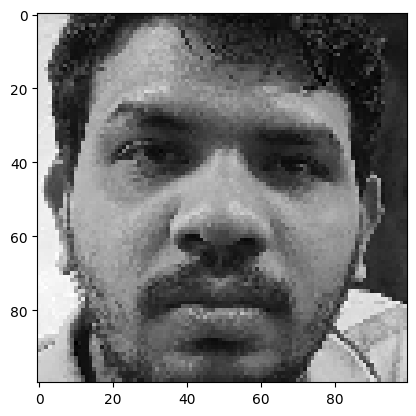

In [27]:
import matplotlib.pyplot as plt
plt.imshow(images[50],cmap='gray')
plt.show()

In [28]:
import cv2

In [29]:
def processing(img):
  img = cv2.equalizeHist(img)#it increase the contrast
  img = img.reshape(100,100,1)
  img=img/255
  return img

In [30]:
images = np.array(list(map(processing,images)))
print('Shape of input:',images.shape)

Shape of input: (295, 100, 100, 1)


In [31]:
from keras.utils import to_categorical
labels = to_categorical(labels)
print('Shape of output:',labels.shape)

Shape of output: (295, 3)


In [32]:
from keras.models import Sequential
from keras.layers import Dense

from keras.optimizers import Adam

from keras.layers import Conv2D,MaxPooling2D,Flatten

In [33]:
def lenet_model():
  model=Sequential()
  #Convolutional layer and Relu layer
  model.add(Conv2D(30,(5,5),activation='relu',input_shape=(100,100,1)))
  #pooling layer
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  #Flatten layer
  model.add(Flatten())

  #Hidden layer
  model.add(Dense(200,activation='relu'))

  #Output layer
  model.add(Dense(3,activation='softmax'))
  model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [34]:
model=lenet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 30)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 15)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 7935)              0         
                                                                 
 dense (Dense)               (None, 200)               1

In [35]:
model.fit(images,labels,validation_split=0.1,epochs=10)

Epoch 1/10
9/9 [==============================] - 4s 320ms/step - loss: 0.8233 - accuracy: 0.7170 - val_loss: 0.8756 - val_accuracy: 0.3333
Epoch 2/10
9/9 [==============================] - 4s 414ms/step - loss: 0.1146 - accuracy: 0.9887 - val_loss: 0.0377 - val_accuracy: 1.0000
Epoch 3/10
9/9 [==============================] - 2s 264ms/step - loss: 0.0105 - accuracy: 0.9962 - val_loss: 1.1058e-04 - val_accuracy: 1.0000
Epoch 4/10
9/9 [==============================] - 2s 263ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 2.6242e-04 - val_accuracy: 1.0000
Epoch 5/10
9/9 [==============================] - 2s 265ms/step - loss: 6.0386e-04 - accuracy: 1.0000 - val_loss: 1.0731e-04 - val_accuracy: 1.0000
Epoch 6/10
9/9 [==============================] - 2s 257ms/step - loss: 2.2678e-04 - accuracy: 1.0000 - val_loss: 9.0240e-06 - val_accuracy: 1.0000
Epoch 7/10
9/9 [==============================] - 4s 404ms/step - loss: 1.0785e-04 - accuracy: 1.0000 - val_loss: 2.8570e-06 - val_accur

In [36]:
model.save('final_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
